# Initial analysis of merged data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Take a look at the dataset

Pick the continuous features and compute the correlation heatmap.  We find that `IN_LEAGUE_NEXT` and `WAIVED_NBA_YEAR` are our best bets for a response variable, since they have the strongest correlations with the stats data.

In [2]:
!ls Data/merged_data
df = pd.read_csv("Data/merged_data/merged_data_collapsed_teams.csv").dropna() #drop NAN rows

merged_data_collapsed_teams.csv


In [12]:
all_cols = list(df.columns)

#drop first four columns (NAME, PLAYER_ID, SEASON_START, TEAMS_LIST) and 6th column (POS) because it's categorical
features = all_cols[4:6] + all_cols[7:-19] + all_cols[-1:]

<Axes: >

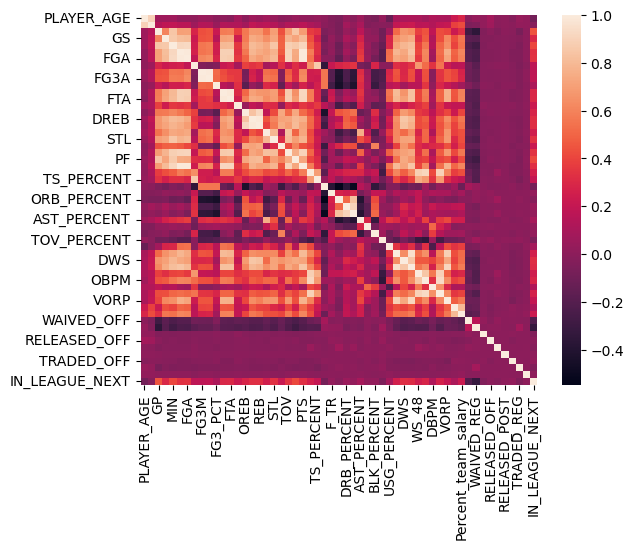

In [13]:
response_vars = all_cols[-28:]

corr = df[features].corr()

sns.heatmap(corr)

In [15]:
corr.IN_LEAGUE_NEXT

PLAYER_AGE            -0.090205
EXPERIENCE            -0.023300
GP                     0.445148
GS                     0.296357
MIN                    0.402708
FGM                    0.332489
FGA                    0.337437
FG_PCT                 0.179278
FG3M                   0.174645
FG3A                   0.181073
FG3_PCT                0.107803
FTM                    0.287988
FTA                    0.298033
FT_PCT                 0.223487
OREB                   0.281000
DREB                   0.323175
REB                    0.321762
AST                    0.246663
STL                    0.332586
BLK                    0.216754
TOV                    0.339693
PF                     0.411087
PTS                    0.327447
PER                    0.252143
TS_PERCENT             0.198701
X3P_AR                -0.081465
F_TR                   0.026925
ORB_PERCENT           -0.015887
DRB_PERCENT            0.051431
TRB_PERCENT            0.026429
AST_PERCENT            0.089201
STL_PERC

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.decomposition import PCA

In [19]:
predictors = features[:-1]

In [20]:
#make split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df.IN_LEAGUE_NEXT, 
                                                    test_size=0.2, random_state=5, shuffle=True, stratify=df.IN_LEAGUE_NEXT.values)

In [21]:
#oversample the rare class (waived players)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=5)
X_train_re, y_train_re = smote.fit_resample(X_train, y_train)

In [69]:
k = 15
knn = Pipeline([("scale", StandardScaler()), ("pca", PCA(4)), ("knn", KNeighborsClassifier(k))])

knn.fit(X_train_re, y_train_re)

preds = knn.predict(X_test)

acc = accuracy_score(y_test, preds)

conf = confusion_matrix(y_test, preds)

print(acc)
print(conf)

0.7444993264481365
[[ 316  117]
 [ 452 1342]]


In [70]:
lr = Pipeline([("scale", StandardScaler()), ("pca", PCA(3)), ("log_reg", LogisticRegression(penalty=None, max_iter=1000))])

lr.fit(X_train_re, y_train_re)

preds = lr.predict(X_test)

acc = accuracy_score(y_test, preds)

conf = confusion_matrix(y_test, preds)

print(acc)
print(conf)

0.69690166142793
[[ 342   91]
 [ 584 1210]]


In [71]:
lda = Pipeline([("scale", StandardScaler()), ("pca", PCA(4)), ("lda", LinearDiscriminantAnalysis())])

lda.fit(X_train_re, y_train_re)

preds = lda.predict(X_test)

acc = accuracy_score(y_test, preds)

conf = confusion_matrix(y_test, preds)

print(acc)
print(conf)

0.6802873821284239
[[ 349   84]
 [ 628 1166]]


In [72]:
qda = Pipeline([("scale", StandardScaler()), ("pca", PCA(5)), ("qda", QuadraticDiscriminantAnalysis())])

qda.fit(X_train_re, y_train_re)

preds = qda.predict(X_test)

acc = accuracy_score(y_test, preds)

conf = confusion_matrix(y_test, preds)

print(acc)
print(conf)

0.7229456668163449
[[ 341   92]
 [ 525 1269]]
